## Import Dataset

In [1]:
import pandas as pd

df = pd.read_csv('Dataset/Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Rename Column

In [2]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age',
                       'Annual Income (k$)': 'annual_income',
                       'Spending Score (1-100)': 'spending_score'})

df.head()

,CustomerID,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Delete Unused Column

In [3]:
df = df.drop(columns=['CustomerID', 'gender'])

df.head()

,age,annual_income,spending_score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


## Import K-Means Model and Declare a Function to find all Inertia on Each Cluster

In [4]:
from sklearn.cluster import KMeans
import seaborn as sns

def find_inertia(data, max_cluster):
    cluster = []
    inertia = []
    for i in range(1, max_cluster):
        model = KMeans(n_clusters = i, n_init = 'auto', random_state = 42)
        model.fit(data)
        cluster.append(i)
        inertia.append(model.inertia_)
        
    chart = sns.lineplot(x=cluster, y=inertia)
    chart.set(xlabel='Clusters', ylabel='Inertia')

## Call the Inertia Function and Generate The Result for 10 Clusters

C:\Users\azhar\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\azhar\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\azhar\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\azhar\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

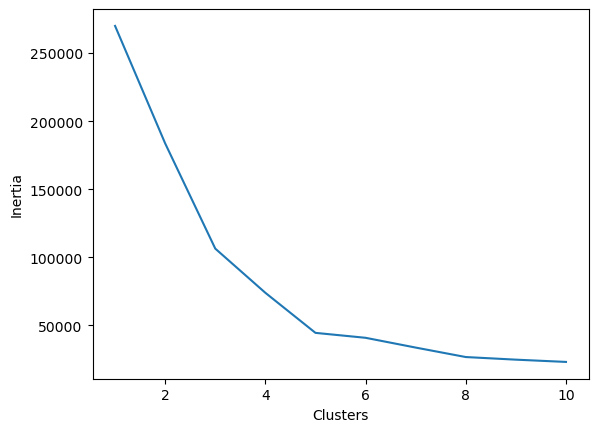

In [5]:
find_inertia(df[['annual_income', 'spending_score']], 11)

## Insert Cluster Labels into Data Frame

In [6]:
x_col = 'annual_income'
y_col = 'spending_score'

for i in range(5, 9):
    model = KMeans(n_clusters = i, n_init = 'auto', random_state = 42)
    model.fit(df[[x_col, y_col]])
    df[f'kmeans_{i}'] = model.labels_

df.head()

C:\Users\azhar\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\azhar\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\azhar\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\azhar\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

,age,annual_income,spending_score,kmeans_5,kmeans_6,kmeans_7,kmeans_8
0,19,15,39,4,5,5,6
1,21,15,81,2,2,2,3
2,20,16,6,4,4,4,4
3,23,16,77,2,2,2,3
4,31,17,40,4,5,5,6


## Visualize The Result

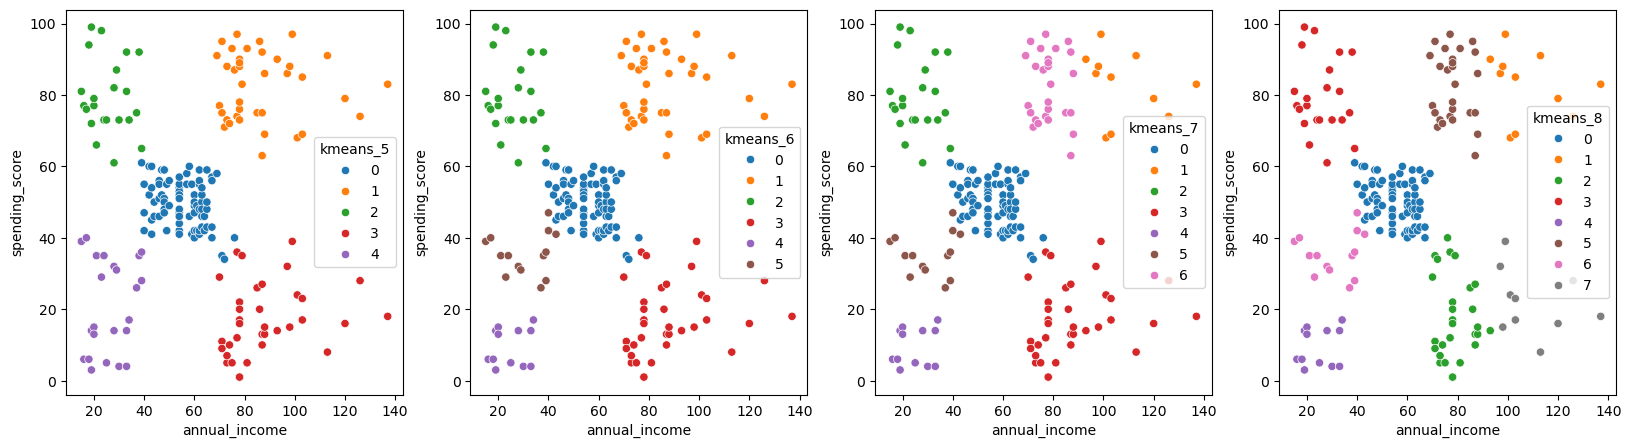

In [7]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=[20, 5])

for i in range (5, 9):
  sns.scatterplot(data=df, x=x_col, y=y_col, hue=df[f'kmeans_{i}'], ax=axes[i-5], palette='tab10')